# ****Preprocessing****

In [110]:
DATASET_NAME = "house-prediction"
BASE_DIR = f"/kaggle/input/{DATASET_NAME}/RealEstate_Multimodal"

TRAIN_CSV = f"{BASE_DIR}/data/train(1).xlsx"
TEST_CSV  = f"{BASE_DIR}/data/test2.xlsx"

TRAIN_IMG_DIR = f"{BASE_DIR}/images/train"
TEST_IMG_DIR  = f"{BASE_DIR}/images/test"

In [111]:
import pandas as pd
train_df = pd.read_excel(TRAIN_CSV)
test_df  = pd.read_excel(TEST_CSV)

In [112]:
train_df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  
0        9240  
1        3605  
2        7455  
3         750  
4        8071  

[5 rows x 21 columns]

In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [114]:
train_df["date"] = pd.to_datetime(train_df["date"], errors="coerce")
test_df["date"] = pd.to_datetime(test_df["date"], errors="coerce")

train_df["sale_month"] = train_df["date"].dt.month
test_df["sale_month"] = test_df["date"].dt.month

train_df.drop(columns=["date"], inplace=True)
test_df.drop(columns=["date"], inplace=True)

In [115]:
# Store id separately
train_ids = train_df["id"].copy()
test_ids = test_df["id"].copy()

# EDA(Tabular)

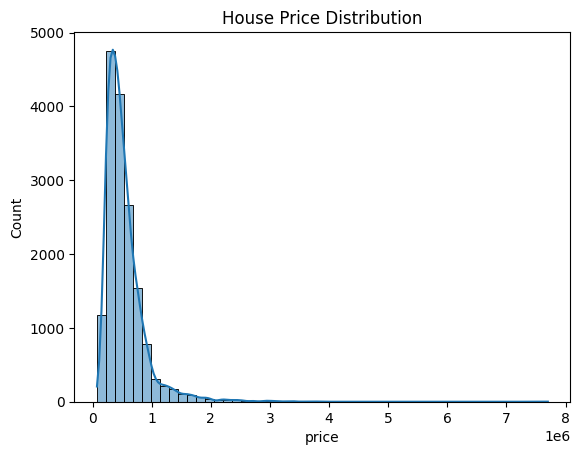

Skewness: 4.033062347507748


In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(train_df["price"], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

print("Skewness:", train_df["price"].skew())

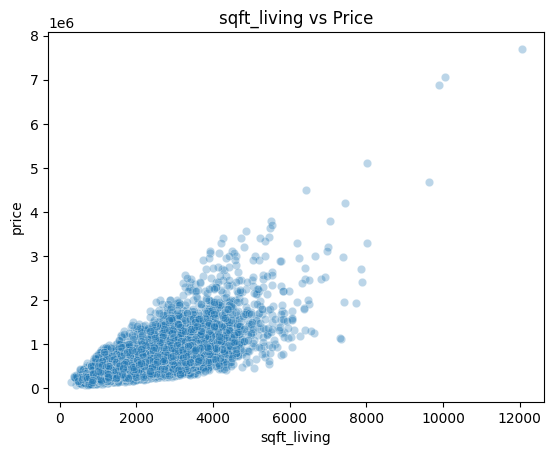

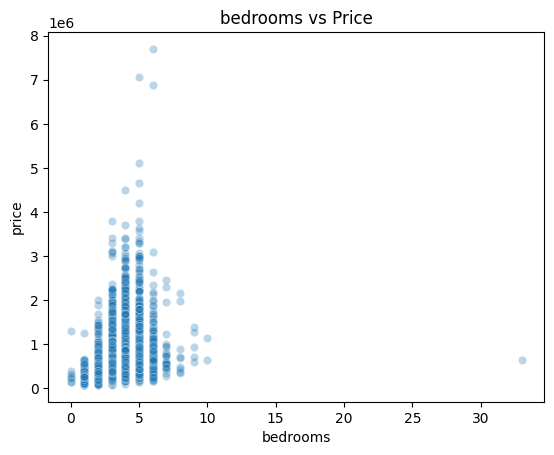

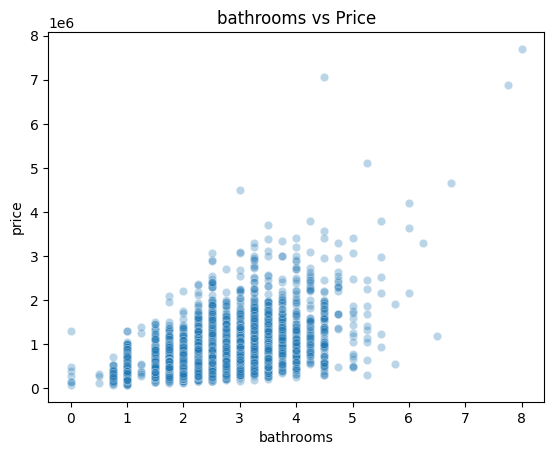

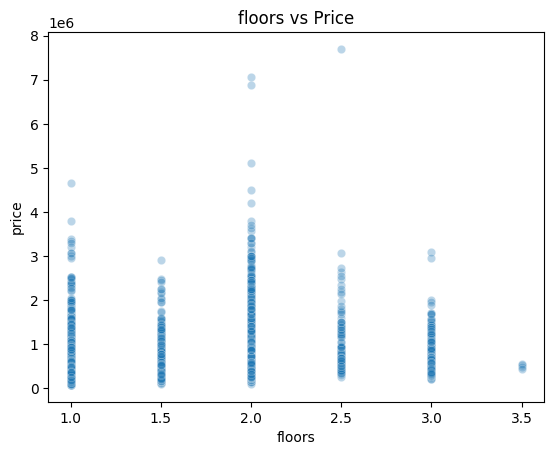

In [117]:
features = ["sqft_living", "bedrooms", "bathrooms", "floors"]

for col in features:
    plt.figure()
    sns.scatterplot(x=train_df[col], y=train_df["price"], alpha=0.3)
    plt.title(f"{col} vs Price")
    plt.show()

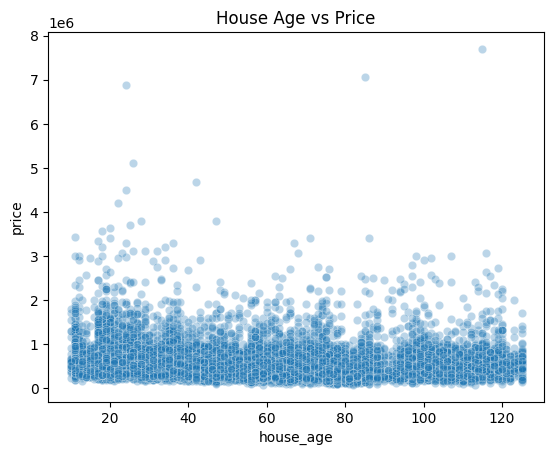

In [118]:
train_df["house_age"] = 2025 - train_df["yr_built"]
plt.figure()
sns.scatterplot(x=train_df["house_age"], y=train_df["price"], alpha=0.3)
plt.title("House Age vs Price")
plt.show()
train_df.drop(columns=["yr_built"], inplace=True)

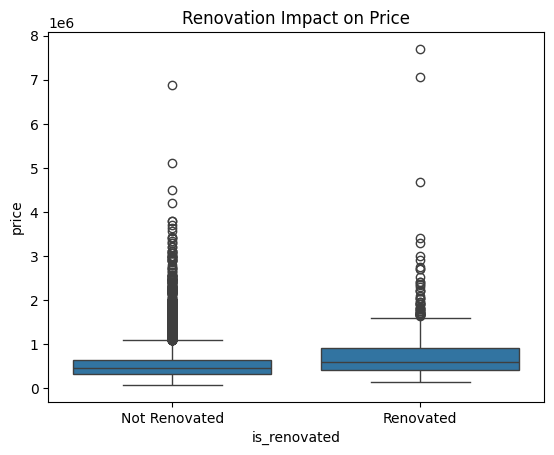

In [119]:
train_df["is_renovated"] = (train_df["yr_renovated"] > 0).astype(int)
plt.figure()
sns.boxplot(
    x="is_renovated",
    y="price",
    data=train_df
)
plt.xticks([0,1], ["Not Renovated", "Renovated"])
plt.title("Renovation Impact on Price")
plt.show()
train_df.drop(columns=["yr_renovated"], inplace=True)

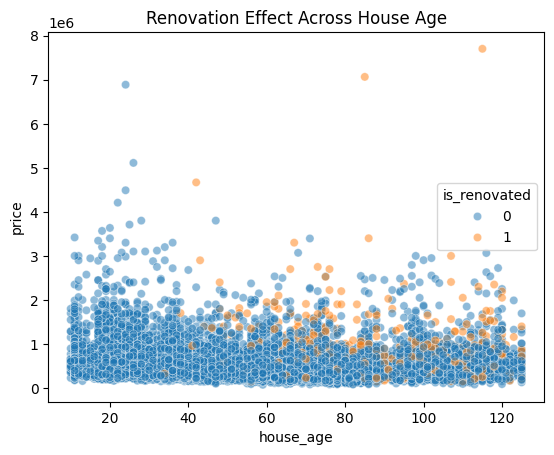

In [120]:
plt.figure()
sns.scatterplot(
    x="house_age",
    y="price",
    hue="is_renovated",
    data=train_df,
    alpha=0.5
)
plt.title("Renovation Effect Across House Age")
plt.show()

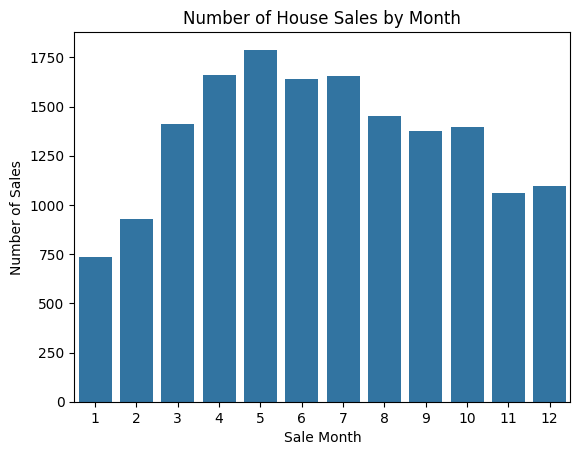

In [121]:
plt.figure()
sns.countplot(x="sale_month", data=train_df)
plt.xlabel("Sale Month")
plt.ylabel("Number of Sales")
plt.title("Number of House Sales by Month")
plt.show()

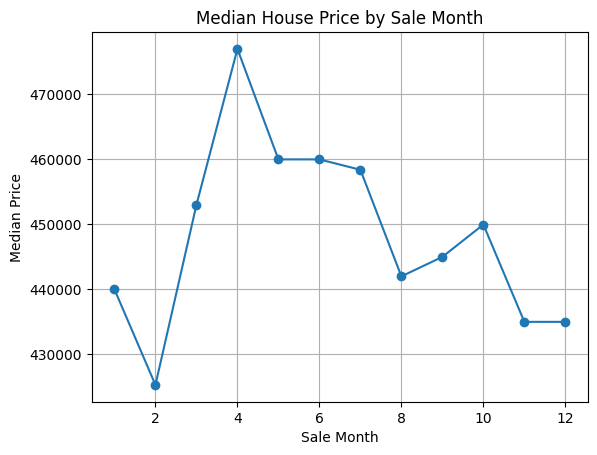

In [122]:
monthly_stats = train_df.groupby("sale_month")["price"].median()

plt.figure()
monthly_stats.plot(marker="o")
plt.xlabel("Sale Month")
plt.ylabel("Median Price")
plt.title("Median House Price by Sale Month")
plt.grid(True)
plt.show()

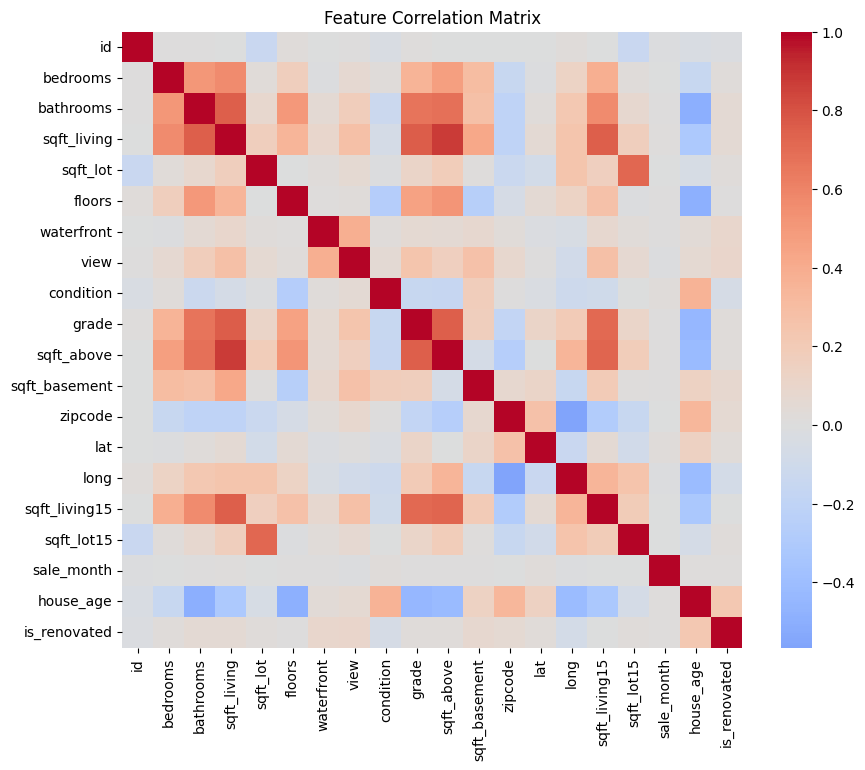

In [123]:
plt.figure(figsize=(10,8))
sns.heatmap(
    train_df.drop(columns=["price"]).corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Feature Correlation Matrix")
plt.show()

In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   price          16209 non-null  int64  
 2   bedrooms       16209 non-null  int64  
 3   bathrooms      16209 non-null  float64
 4   sqft_living    16209 non-null  int64  
 5   sqft_lot       16209 non-null  int64  
 6   floors         16209 non-null  float64
 7   waterfront     16209 non-null  int64  
 8   view           16209 non-null  int64  
 9   condition      16209 non-null  int64  
 10  grade          16209 non-null  int64  
 11  sqft_above     16209 non-null  int64  
 12  sqft_basement  16209 non-null  int64  
 13  zipcode        16209 non-null  int64  
 14  lat            16209 non-null  float64
 15  long           16209 non-null  float64
 16  sqft_living15  16209 non-null  int64  
 17  sqft_lot15     16209 non-null  int64  
 18  sale_m

# EDA(Images)

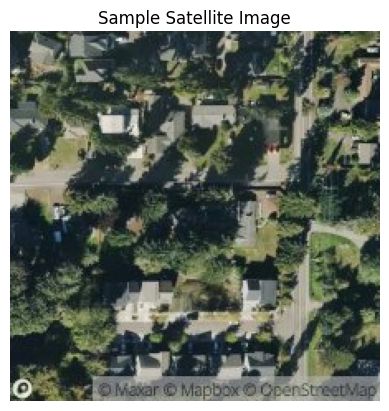

In [125]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = f"{TRAIN_IMG_DIR}/{train_ids.iloc[0]}.png"

img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.title("Sample Satellite Image")
plt.show()

In [126]:
import os

train_img_count = len(os.listdir(TRAIN_IMG_DIR))
test_img_count = len(os.listdir(TEST_IMG_DIR))

print(f"Train images: {train_img_count}")
print(f"Test images: {test_img_count}")
print(f"Total images: {train_img_count + test_img_count}")

Train images: 16110
Test images: 5396
Total images: 21506


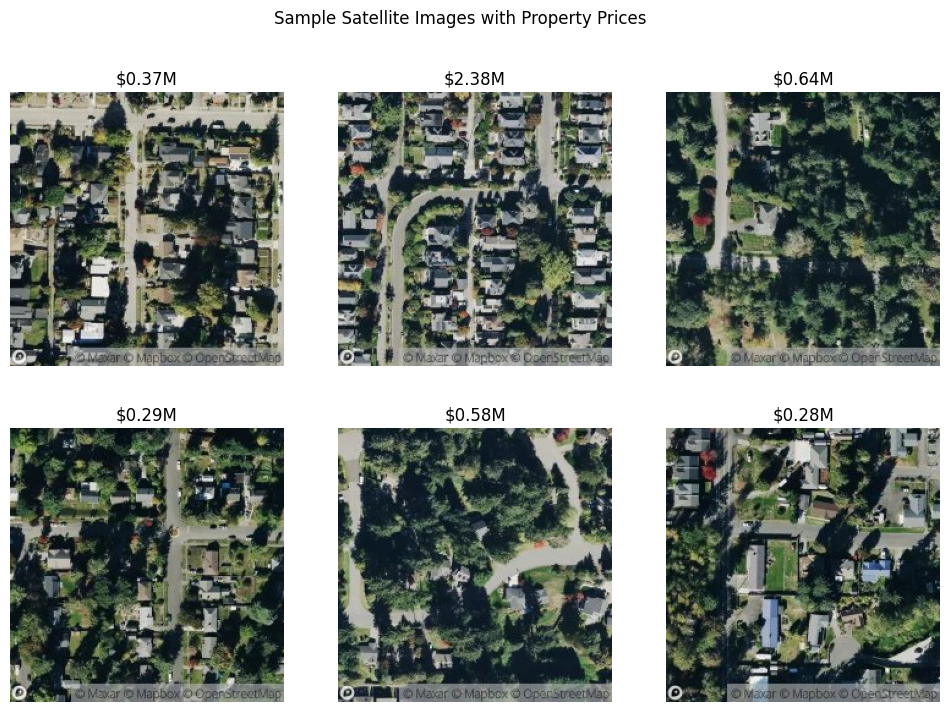

In [127]:
import random
sample_idxs = random.sample(range(len(train_df)), 6)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(sample_idxs):
    pid = train_ids.iloc[idx]
    price = train_df.iloc[idx]["price"]
    img = Image.open(f"{TRAIN_IMG_DIR}/{pid}.png")

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"${price/1e6:.2f}M")
    plt.axis("off")

plt.suptitle("Sample Satellite Images with Property Prices")
plt.show()

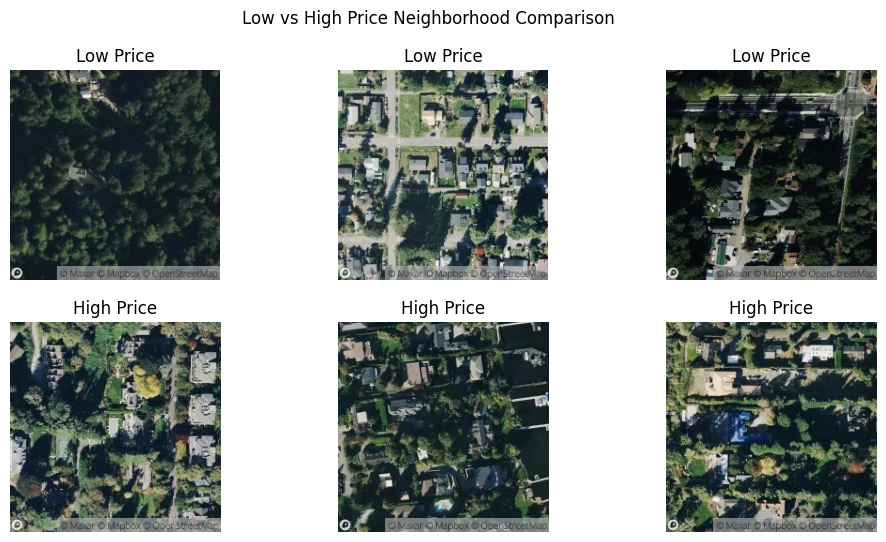

In [128]:
low_idxs = train_df.nsmallest(3, "price").index
high_idxs = train_df.nlargest(3, "price").index

plt.figure(figsize=(12, 6))

for i, idx in enumerate(low_idxs):
    img = Image.open(f"{TRAIN_IMG_DIR}/{train_ids.iloc[idx]}.png")
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title("Low Price")
    plt.axis("off")

for i, idx in enumerate(high_idxs):
    img = Image.open(f"{TRAIN_IMG_DIR}/{train_ids.iloc[idx]}.png")
    plt.subplot(2, 3, i+4)
    plt.imshow(img)
    plt.title("High Price")
    plt.axis("off")

plt.suptitle("Low vs High Price Neighborhood Comparison")
plt.show()

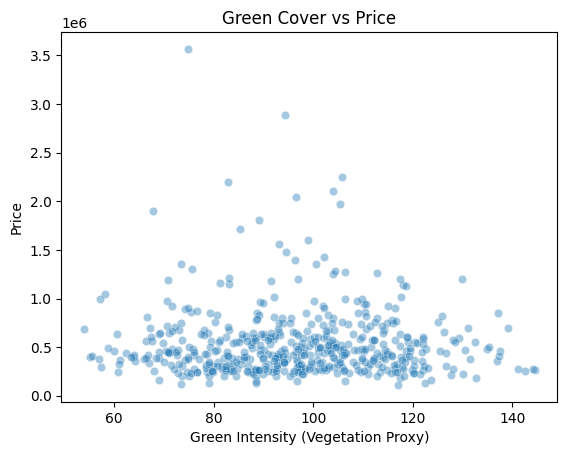

In [129]:
def green_intensity(img_path):
    img = np.array(Image.open(img_path))
    return img[:, :, 1].mean()

green_vals = []
prices = []

for idx in random.sample(range(len(train_df)), 500):
    pid = train_ids.iloc[idx]
    green_vals.append(green_intensity(f"{TRAIN_IMG_DIR}/{pid}.png"))
    prices.append(train_df.iloc[idx]["price"])

plt.figure()
sns.scatterplot(x=green_vals, y=prices, alpha=0.4)
plt.xlabel("Green Intensity (Vegetation Proxy)")
plt.ylabel("Price")
plt.title("Green Cover vs Price")
plt.show()

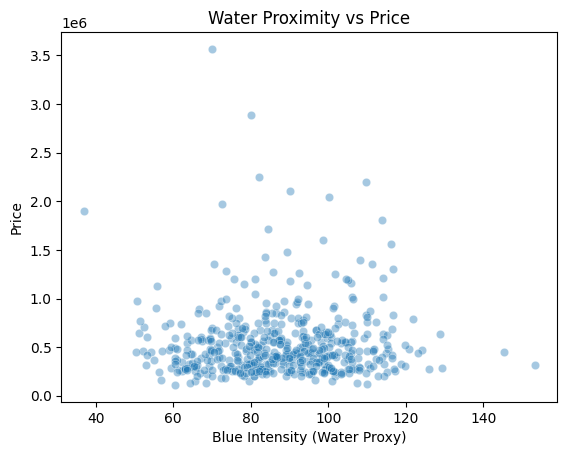

In [130]:
def blue_intensity(img_path):
    img = np.array(Image.open(img_path))
    return img[:, :, 2].mean()

blue_vals = []

for idx in random.sample(range(len(train_df)), 500):
    pid = train_ids.iloc[idx]
    blue_vals.append(blue_intensity(f"{TRAIN_IMG_DIR}/{pid}.png"))

plt.figure()
sns.scatterplot(x=blue_vals, y=prices, alpha=0.4)
plt.xlabel("Blue Intensity (Water Proxy)")
plt.ylabel("Price")
plt.title("Water Proximity vs Price")
plt.show()

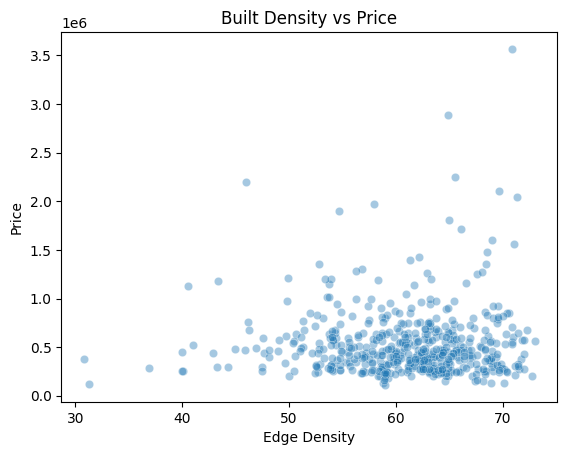

In [131]:
import cv2
def edge_density(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges.mean()

edge_vals = []

for idx in random.sample(range(len(train_df)), 500):
    pid = train_ids.iloc[idx]
    edge_vals.append(edge_density(f"{TRAIN_IMG_DIR}/{pid}.png"))

plt.figure()
sns.scatterplot(x=edge_vals, y=prices, alpha=0.4)
plt.xlabel("Edge Density")
plt.ylabel("Price")
plt.title("Built Density vs Price")
plt.show()

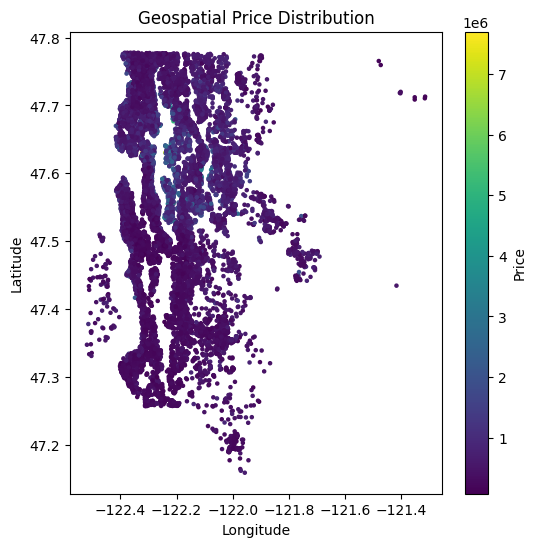

In [132]:
plt.figure(figsize=(6,6))
plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["price"],
    cmap="viridis",
    s=5
)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Price Distribution")
plt.show()

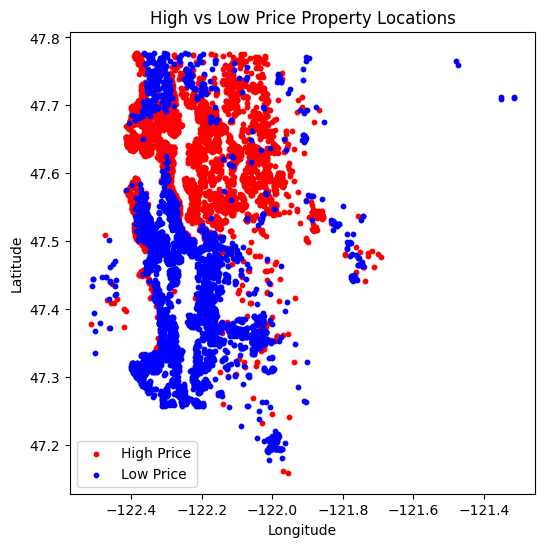

In [133]:
high_price = train_df[train_df["price"] > train_df["price"].quantile(0.75)]
low_price = train_df[train_df["price"] < train_df["price"].quantile(0.25)]

plt.figure(figsize=(6,6))
plt.scatter(high_price["long"], high_price["lat"],
            color="red", s=10, label="High Price")
plt.scatter(low_price["long"], low_price["lat"],
            color="blue", s=10, label="Low Price")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("High vs Low Price Property Locations")
plt.show()

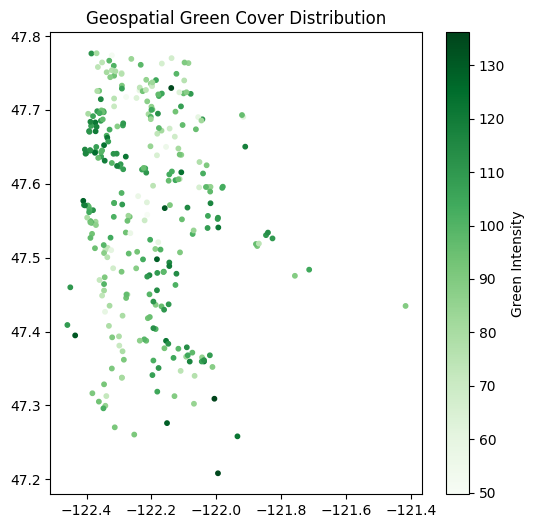

In [134]:
green_map = []

for idx in range(300):
    pid = train_ids.iloc[idx]
    green_map.append(green_intensity(f"{TRAIN_IMG_DIR}/{pid}.png"))

plt.figure(figsize=(6,6))
plt.scatter(
    train_df.iloc[:300]["long"],
    train_df.iloc[:300]["lat"],
    c=green_map,
    cmap="Greens",
    s=10
)
plt.colorbar(label="Green Intensity")
plt.title("Geospatial Green Cover Distribution")
plt.show()

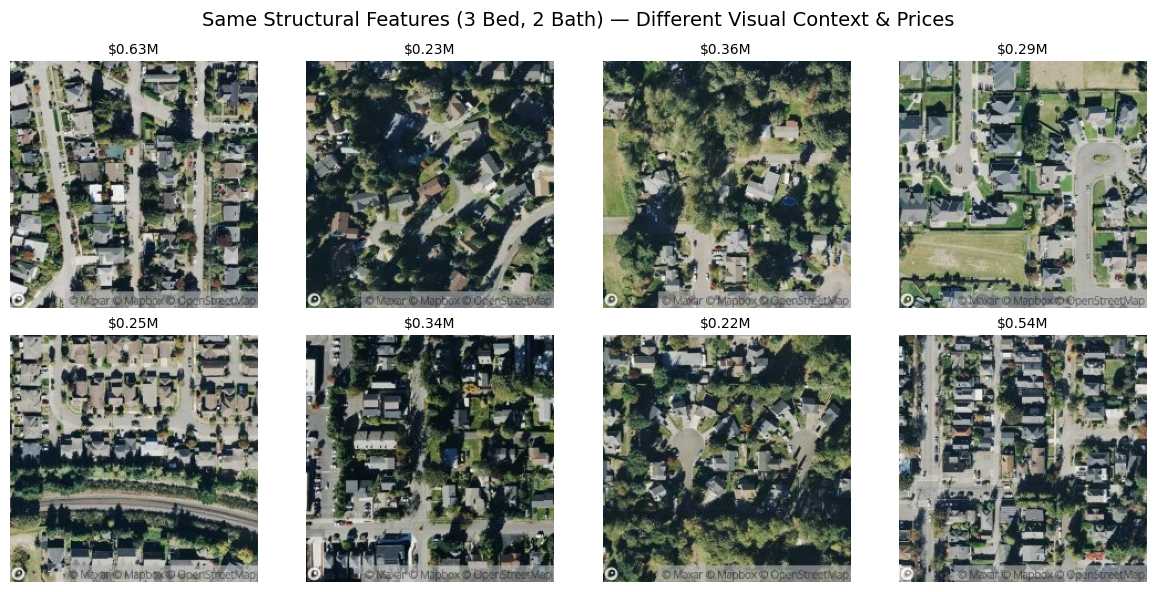

In [135]:
subset = train_df[(train_df["bedrooms"] == 3) & (train_df["bathrooms"] == 2)].sample(8)

plt.figure(figsize=(12, 6))

for i, idx in enumerate(subset.index):
    img = Image.open(f"{TRAIN_IMG_DIR}/{train_ids.iloc[idx]}.png")
    price = train_df.loc[idx, "price"]

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(f"${price/1e6:.2f}M", fontsize=10)
    plt.axis("off")

plt.suptitle(
    "Same Structural Features (3 Bed, 2 Bath) — Different Visual Context & Prices",
    fontsize=14)
plt.tight_layout()
plt.show()

In [136]:
import numpy as np

train_df["sale_month_sin"] = np.sin(2 * np.pi * train_df["sale_month"] / 12)
train_df["sale_month_cos"] = np.cos(2 * np.pi * train_df["sale_month"] / 12)

test_df["sale_month_sin"] = np.sin(2 * np.pi * test_df["sale_month"] / 12)
test_df["sale_month_cos"] = np.cos(2 * np.pi * test_df["sale_month"] / 12)

In [137]:
import os
os.makedirs("processed_data", exist_ok=True)

train_df.to_csv("processed_data/train_processed.csv", index=False)
test_df.to_csv("processed_data/test_processed.csv", index=False)

In [138]:
TABULAR_FEATURES = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "lat",
    "long",
    "house_age",
    "is_renovated",
    "sale_month_sin",
    "sale_month_cos"
]

import json
with open("processed_data/tabular_features.json", "w") as f:
    json.dump(TABULAR_FEATURES, f)